# PyTorch Computer vision

### 0. Computervision libraries in PyTorch
* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for yoour own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with ML model
* `torch.tils.data.Datasets` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creater a Python iterable over a dataset

In [ ]:
# Imort pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

### 1. Getting a dataset

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [ ]:
# setup training data
train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)
# setup testing data
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 16141038.00it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272353.81it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5015615.32it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5765628.04it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
type(train_data[0][0]), type(train_data[0][1])

(torch.Tensor, int)

In [ ]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
train_data.classes, train_data.class_to_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [ ]:
type(train_data.targets)

torch.Tensor

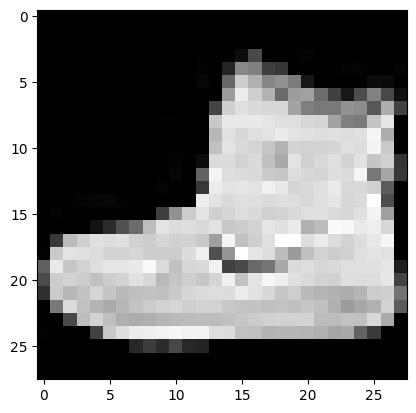

In [ ]:
plt.imshow(train_data[0][0].squeeze(), cmap = 'gray')

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### 2. Prepare DataLoader

Right now our dta is in the form of PyTorch Datasets.
DataLoader turns our dataset into Python iterable.
More specifically, we want to turn our data into batches (or-mini-batches).

But Why?
1. it is computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. sSo we break it down to 32 images at a time (batch size = 32)
2. it guves our neural network more chances to upgrade its gradient per epoch

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = 32,
    shuffle = True
)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = 32,
    shuffle = False
)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7afef756ed70>,
 <torch.utils.data.dataloader.DataLoader at 0x7afef7597010>)

In [ ]:
next(iter(train_dataloader))[0].shape, next(iter(train_dataloader))[1].shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
len(train_dataloader)

1875

### 3. Model 0: Build a baseline model
When starting to build a series of machine learing modelling experiments, it's best practice to start with a baseline model.

A base line model is a simple model you will try  to improve upon with subsequent models/ experiments.

In other words: start simplt and add complexity when necessary.

In [ ]:
len(train_dataloader)

1875

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()
img = next(iter(train_dataloader))[0]

flat = flatten_model(img)
flat.shape

torch.Size([32, 784])

In [ ]:
class LinearModelV0(nn.Module):
  def __init__(self, in_: int, hide_: int, out_: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = in_, out_features = hide_),
        nn.Linear(in_features = hide_, out_features = out_)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0 = LinearModelV0(in_ = 784, hide_ = 10, out_ = len(train_data.classes))
model_0.to(device)

LinearModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0282,  0.0011,  0.0129,  ..., -0.0122, -0.0004,  0.0150],
                      [-0.0040,  0.0043,  0.0107,  ...,  0.0197, -0.0223,  0.0073],
                      [-0.0020, -0.0019, -0.0078,  ...,  0.0232,  0.0259,  0.0165],
                      ...,
                      [-0.0160, -0.0332, -0.0171,  ...,  0.0229, -0.0136, -0.0347],
                      [-0.0305,  0.0325,  0.0198,  ..., -0.0025, -0.0287,  0.0093],
                      [-0.0196, -0.0133,  0.0214,  ..., -0.0119, -0.0215,  0.0138]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0255, -0.0278, -0.0345,  0.0278, -0.0182,  0.0068, -0.0335, -0.0048,
                       0.0030, -0.0049], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0170,  0.1011, -0.0937,  0.2973,  0.3101, -0.1335, -0.1847,  0.1588,
                       -0.1194, -0.1053],
                      [-0

In [ ]:
model_0.parameters()

<generator object Module.parameters at 0x7afef29c9310>

In [ ]:
model_0.to(device)
dummy_x = torch.randn(size = [32,1,28,28]).to(device)
temp = model_0(dummy_x)
temp.shape

torch.Size([32, 10])

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data. our loss function will be `nn.CrossEntropyLoss()`
* optimizer - `torch.optim.SGD()`
* Evaluation metric - accuracy (from torchmetrics)

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)
accuracy_fn = Accuracy(task = 'multiclass', num_classes = len(train_data.classes)).to(device)

# 3.2 Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training setps, claculate the train loss per batch.
3. Looop through testing batches, perform teesting steps, calculate the test loss per batch.
4. Print info

**Note:** since we are computing on batches, the optimizer will update the model's parameters once per batch rather than once per epoch.

In [ ]:
# next(iter(train_dataloader))[1].shape, len(train_dataloader)

# a = next(iter(test_dataloader))

# temp = 0
# for a,(b,c) in enumerate(test_dataloader):
#   temp=a
#   break
# temp

torch.vision.datasets Have `.data`, `.targets`
torch.utils.data.DataLoader Have `.datasets`

In [ ]:
from tqdm.auto import tqdm

epochs = 3

# create training and testing loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}------------')

  # variable to accumulate loss and calculate loss per batch
  train_loss = 0

  # Add a loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    # Batch wise data incoming
    X, y = X.to(device), y.to(device)
    model_0.train()
    # 1. Forward pass

    y_pred = model_0(X) # X shape -> [32,1,28,28]

    # 2. Calculate the loss (PER BATCH)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

    if batch % 100 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_accuracy = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)
      # 1. Forward pass
      test_y_pred = model_0(X_test)

      # 2. calculate the loss and accuracy
      test_loss += loss_fn(test_y_pred, y_test)
      test_accuracy += accuracy_fn(test_y_pred.argmax(dim = 1),y_test)

    test_loss /= len(test_dataloader)
    test_accuracy /= len(test_dataloader)

  print(f'Train loss: {train_loss:.2f}, Test loss: {test_loss:.2f}, Test accuracy: {test_accuracy:.4f}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0------------
Looked at 0/60000 samples
Looked at 3200/60000 samples
Looked at 6400/60000 samples
Looked at 9600/60000 samples
Looked at 12800/60000 samples
Looked at 16000/60000 samples
Looked at 19200/60000 samples
Looked at 22400/60000 samples
Looked at 25600/60000 samples
Looked at 28800/60000 samples
Looked at 32000/60000 samples
Looked at 35200/60000 samples
Looked at 38400/60000 samples
Looked at 41600/60000 samples
Looked at 44800/60000 samples
Looked at 48000/60000 samples
Looked at 51200/60000 samples
Looked at 54400/60000 samples
Looked at 57600/60000 samples
Train loss: 0.58, Test loss: 0.56, Test accuracy: 0.8040
Epoch: 1------------
Looked at 0/60000 samples
Looked at 3200/60000 samples
Looked at 6400/60000 samples
Looked at 9600/60000 samples
Looked at 12800/60000 samples
Looked at 16000/60000 samples
Looked at 19200/60000 samples
Looked at 22400/60000 samples
Looked at 25600/60000 samples
Looked at 28800/60000 samples
Looked at 32000/60000 samples
Looked at 35200

### 4. Make predictions and get Model 0 results

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_function,
    accuracy_function,
    device: torch.device = device
    ):
  loss, accuracy = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss += loss_function(y_pred, y)
      accuracy += accuracy_function(y_pred.argmax(dim = 1), y)
    loss /= len(data_loader)
    accuracy /= len(data_loader)

  return {
      "model_name" : model.__class__.__name__,
      "model_loss" : loss.item(),
      "model_accuracy" : accuracy.item()
  }

In [ ]:
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_function = loss_fn,
                             accuracy_function = accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'LinearModelV0',
 'model_loss': 0.4688055217266083,
 'model_accuracy': 0.8352635502815247}

In [ ]:
device

'cuda'

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_function,
               accuracy_function,
               optimizer: torch.optim,
               device: torch.device = device):
  train_loss, train_accuracy = 0, 0
  # model.to(device)
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # model.to(device)

    y_pred = model(X)

    loss = loss_function(y_pred, y)
    train_loss += loss

    train_accuracy += accuracy_function(y_pred.argmax(dim=1), y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_accuracy /= len(data_loader)
  print(f'train_loss: {train_loss:.2f} | train_accuracy: {train_accuracy:.2f}')

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_function: torch.nn.Module,
              accuracy_function,
              device: torch.device = device):
  test_loss, test_accuracy = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_function(test_pred, y)
      test_accuracy += accuracy_function(test_pred.argmax(dim = 1), y)

    test_loss /= len(data_loader)
    test_accuracy /= len(data_loader)
    print(f'test loss: {test_loss:.2f} | test accuracy: {test_accuracy:.2f}')

In [ ]:
from timeit import default_timer as timer

time_start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}------')
  train_step(model = model_0,
             data_loader = train_dataloader,
             loss_function = loss_fn,
             optimizer = optimizer,
             accuracy_function = accuracy_fn)
  test_step(model = model_0,
             data_loader = test_dataloader,
             loss_function = loss_fn,
             accuracy_function = accuracy_fn)
time_end = timer()
print(f'Time Taken: {time_end - time_start}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0------
train_loss: 0.44 | train_accuracy: 0.84
test loss: 0.47 | test accuracy: 0.83
Epoch: 1------
train_loss: 0.43 | train_accuracy: 0.85
test loss: 0.49 | test accuracy: 0.83
Epoch: 2------
train_loss: 0.43 | train_accuracy: 0.85
test loss: 0.46 | test accuracy: 0.84
Time Taken: 51.29348605599989


### Model 1: Building a Convolution Neural Network (CNN)

In [ ]:
class CNNModelV1(nn.Module):
  def __init__(self,
               in_: int,
               hide_: int,
               out_: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = in_,
                  out_channels = hide_,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hide_,
                  out_channels = hide_,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hide_,
                  out_channels = hide_,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hide_,
                  out_channels = hide_,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classification = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hide_*7*7,
                  out_features = out_)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f'shape after `conv_block_1 layer`: {x.shape}')
    x = self.conv_block_2(x)
    # print(f'shape after `conv_block_2 layer`: {x.shape}')
    x = self.classification(x)
    # print(f'shape after `classification layer`: {x.shape}')
    return x

In [ ]:
model_1 = CNNModelV1(in_ = 1, hide_ = 10, out_ = 10).to(device)

In [ ]:
from torchmetrics import Accuracy

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)
accuracy_fn = Accuracy(task = 'multiclass', num_classes = len(train_data.classes)).to(device)

In [ ]:
dummy_x = torch.randn(size = [32, 1, 28, 28]).to(device)
model_1.eval()
with torch.inference_mode():
  y_pred = model_1(dummy_x)
y_pred

tensor([[-9.3978e-02,  1.4125e-02,  3.8166e-03,  5.6460e-02, -8.2695e-02,
         -8.9690e-02,  5.1104e-05, -1.2650e-01, -5.7843e-02,  8.6514e-02],
        [-9.6993e-02,  5.3383e-03, -2.3745e-02,  6.3845e-02, -7.7732e-02,
         -8.7165e-02, -3.5267e-02, -1.5384e-01, -4.2934e-02,  5.1734e-02],
        [-8.7095e-02,  6.3287e-03,  2.2996e-02,  4.5842e-02, -8.0283e-02,
         -9.2036e-02, -3.8305e-02, -1.4087e-01, -4.3476e-02,  9.0053e-02],
        [-7.9519e-02,  4.0517e-03,  9.4572e-03,  3.3716e-02, -7.7646e-02,
         -8.2374e-02, -3.3103e-02, -1.5101e-01, -3.5233e-02,  7.1930e-02],
        [-1.1799e-01, -1.4436e-02, -2.0934e-03,  5.8181e-02, -1.0156e-01,
         -9.3574e-02, -1.6317e-02, -1.5246e-01, -9.2428e-03,  6.4187e-02],
        [-1.0867e-01,  7.9377e-03,  3.5137e-04,  5.1900e-02, -9.1994e-02,
         -1.1227e-01, -2.9447e-02, -1.5401e-01, -2.8877e-02,  7.7697e-02],
        [-9.4712e-02, -2.2212e-03, -1.0842e-02,  8.2330e-02, -8.1015e-02,
         -1.1835e-01, -2.4375e-0

In [ ]:
from timeit import default_timer as timer

time_start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}------')
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_function = loss_fn,
             optimizer = optimizer,
             accuracy_function = accuracy_fn)
  test_step(model = model_1,
             data_loader = test_dataloader,
             loss_function = loss_fn,
             accuracy_function = accuracy_fn)
time_end = timer()
print(f'Time Taken: {time_end - time_start}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0------
train_loss: 0.54 | train_accuracy: 0.81
test loss: 0.39 | test accuracy: 0.86
Epoch: 1------
train_loss: 0.35 | train_accuracy: 0.88
test loss: 0.36 | test accuracy: 0.87
Epoch: 2------
train_loss: 0.31 | train_accuracy: 0.89
test loss: 0.35 | test accuracy: 0.87
Time Taken: 49.15734948199997


In [ ]:
model_1_results = eval_model(
    model = model_1,
    data_loader = test_dataloader,
    loss_function = loss_fn,
    accuracy_function = accuracy_fn
)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results

{'model_name': 'CNNModelV1',
 'model_loss': 0.350852370262146,
 'model_accuracy': 0.8715055584907532}

In [ ]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
len(train_data.classes)

10

In [ ]:
model_2 = FashionMNISTModelV1(input_shape = 28*28, hidden_units = 10, output_shape = len(train_data.classes)).to(device)

In [ ]:
from torchmetrics import Accuracy

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)
accuracy_fn = Accuracy(task = 'multiclass', num_classes = len(train_data.classes)).to(device)

In [ ]:
from timeit import default_timer as timer

time_start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}------')
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_function = loss_fn,
             optimizer = optimizer,
             accuracy_function = accuracy_fn)
  test_step(model = model_2,
             data_loader = test_dataloader,
             loss_function = loss_fn,
             accuracy_function = accuracy_fn)
time_end = timer()
print(f'Time Taken: {time_end - time_start}')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0------
train_loss: 0.66 | train_accuracy: 0.77
test loss: 0.53 | test accuracy: 0.82
Epoch: 1------
train_loss: 0.49 | train_accuracy: 0.83
test loss: 0.50 | test accuracy: 0.83
Epoch: 2------
train_loss: 0.46 | train_accuracy: 0.84
test loss: 0.48 | test accuracy: 0.83
Time Taken: 41.10891129300012


In [ ]:
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_function = loss_fn,
                             accuracy_function = accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.47566086053848267,
 'model_accuracy': 0.8304712176322937}

### Comparing model results

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,LinearModelV0,0.468806,0.835264
1,CNNModelV1,0.350852,0.871506
2,FashionMNISTModelV1,0.475661,0.830471


In [ ]:
compare_results['XXX'] = [1,2,'878']

Text(0, 0.5, 'model')

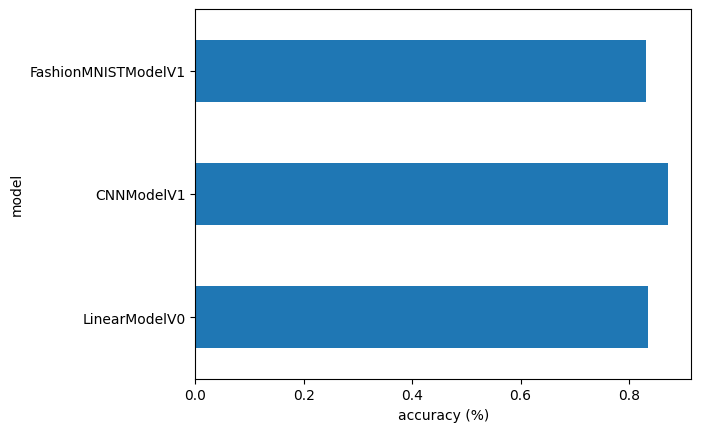

In [ ]:
compare_results.set_index('model_name')['model_accuracy'].plot(kind = 'barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

### 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # Get prediction probabilities (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
len(test_samples)

9